# Import Library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from IPython.display import display

# Dataset

In [ ]:
# Install Dataset
!pip install kaggle --quiet
!kaggle datasets download -d vjchoudhary7/customer-segmentation-tutorial-in-python
!unzip -q /content/customer-segmentation-tutorial-in-python.zip -d /content


Dataset URL: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python
License(s): other
  0% 0.00/1.55k [00:00<?, ?B/s]
100% 1.55k/1.55k [00:00<00:00, 2.52MB/s]


# Exploratory Data Analysis (EDA)

In [ ]:
df = pd.read_csv('/content/Mall_Customers.csv')

In [ ]:
display(df.head())

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Menampilkan informasi umum dataset
print("="*40)
print("Informasi Dataset")
print("="*40)
df.info()

# Menampilkan tipe data setiap kolom
print("\n" + "="*40)
print("Tipe Data Setiap Kolom")
print("="*40)
print(df.dtypes)

Informasi Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

Tipe Data Setiap Kolom
CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


In [ ]:
# Menampilkan jumlah baris dan kolom
print("\n" + "="*40)
print("Dimensi Dataset")
print("="*40)
print(f"Jumlah Baris  : {df.shape[0]}")
print(f"Jumlah Kolom  : {df.shape[1]}")

# Menampilkan jumlah baris yang terduplikasi
print("\n" + "="*40)
print("Jumlah Duplikasi")
print("="*40)
print(f"Jumlah baris yang terduplikat: {df.duplicated().sum()}")

# Menampilkan jumlah nilai yang hilang di setiap kolom
print("\n" + "="*40)
print("Jumlah Missing Values")
print("="*40)
print(df.isnull().sum())


Dimensi Dataset
Jumlah Baris  : 200
Jumlah Kolom  : 5

Jumlah Duplikasi
Jumlah baris yang terduplikat: 0

Jumlah Missing Values
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


## Preprocessing

In [ ]:
df.columns = ['id', 'gender', 'age', 'income', 'score']

In [ ]:
display(df.head())

,id,gender,age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])

In [ ]:
display(df.head())

,id,gender,age,income,score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


## Distribusi Data

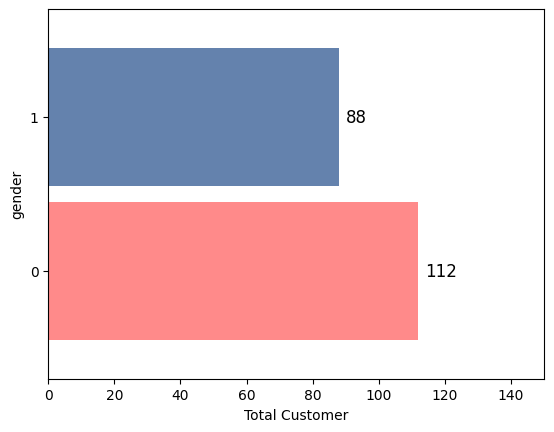

In [ ]:
ax = df['gender'].value_counts().plot(kind='barh', color=['#FF8A8A', '#6482AD'], width=0.9)

for p in ax.patches:
    ax.annotate(f'{p.get_width()}',
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center',
                fontsize=12, color='black',
                xytext=(5, 0), textcoords='offset points')


plt.ylabel('gender')
plt.xlabel('Total Customer')
plt.yticks(rotation=0)
plt.xlim(0, 150)
plt.show()

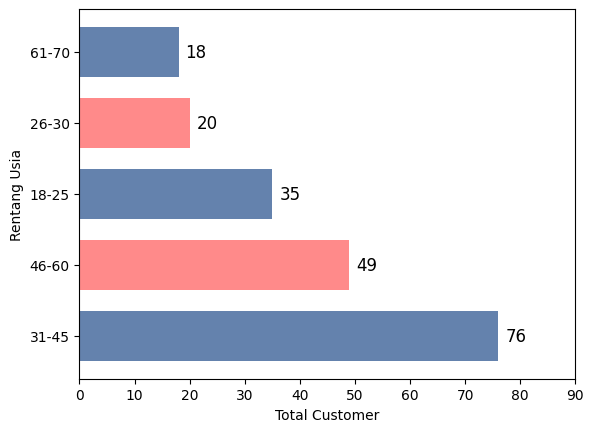

In [ ]:
bins = [18, 25, 30, 45, 60, 70]
labels = ['18-25', '26-30', '31-45', '46-60', '61-70']
df['age-range'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

ax = df['age-range'].value_counts().plot(kind='barh', color=['#6482AD', '#FF8A8A', '#6482AD', '#FF8A8A', '#6482AD', '#FF8A8A'], width=0.7)

for p in ax.patches:
    ax.annotate(f'{p.get_width()}',
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center',
                fontsize=12, color='black',
                xytext=(5, 0), textcoords='offset points')

plt.xlabel('Total Customer')
plt.ylabel('Rentang Usia')
plt.yticks(rotation=0)
plt.xlim(0, 90)
plt.show()

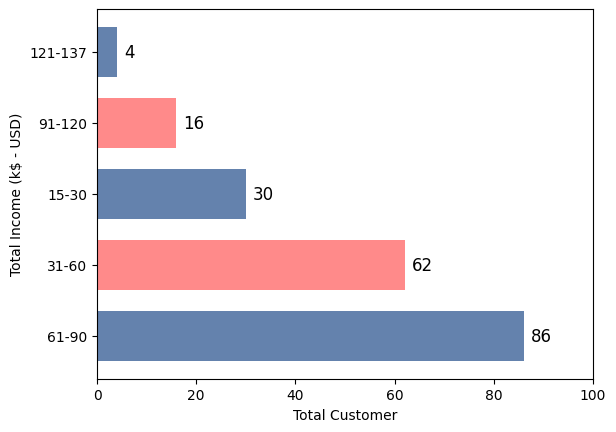

In [ ]:
bins = [15, 30, 60, 90, 120, 137]
labels = ['15-30', '31-60', '61-90', '91-120', '121-137']
df['income-range'] = pd.cut(df['income'], bins=bins, labels=labels, right=False)

ax = df['income-range'].value_counts().plot(kind='barh', color=['#6482AD', '#FF8A8A', '#6482AD', '#FF8A8A', '#6482AD'], width=0.7)

for p in ax.patches:
    ax.annotate(f'{p.get_width()}',
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center',
                fontsize=12, color='black',
                xytext=(5, 0), textcoords='offset points')


plt.xlabel('Total Customer')
plt.ylabel('Total Income (k$ - USD)')
plt.yticks(rotation=0)
plt.xlim(0, 100)
plt.show()

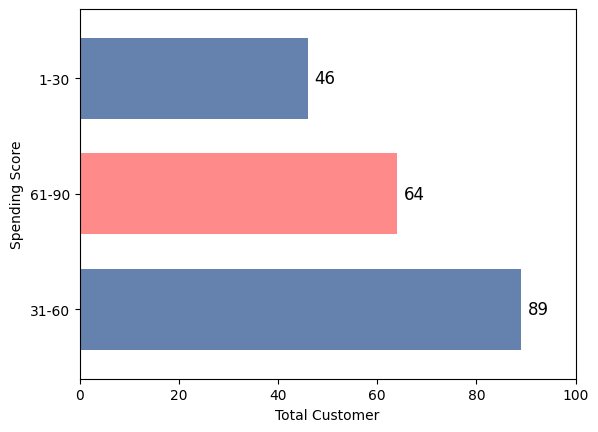

In [ ]:
bins = [1, 30, 60, 99]
labels = ['1-30', '31-60', '61-90']
df['score-distribution'] = pd.cut(df['score'], bins=bins, labels=labels, right=False)

ax = df['score-distribution'].value_counts().plot(kind='barh', color=['#6482AD', '#FF8A8A', '#6482AD'], width=0.7)

for p in ax.patches:
    ax.annotate(f'{p.get_width()}',
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center',
                fontsize=12, color='black',
                xytext=(5, 0), textcoords='offset points')

plt.xlabel('Total Customer')
plt.ylabel('Spending Score')
plt.yticks(rotation=0)
plt.xlim(0, 100)
plt.show()

## Confussion Matrix

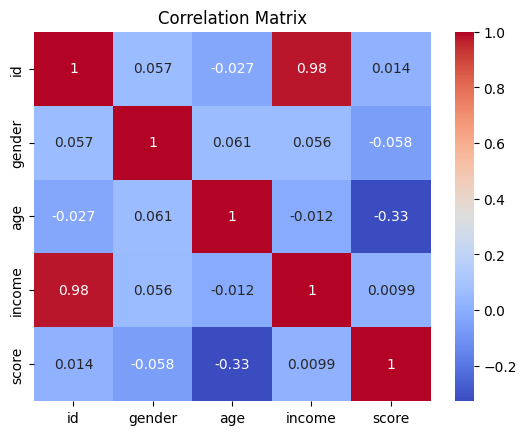

In [ ]:
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Modeling

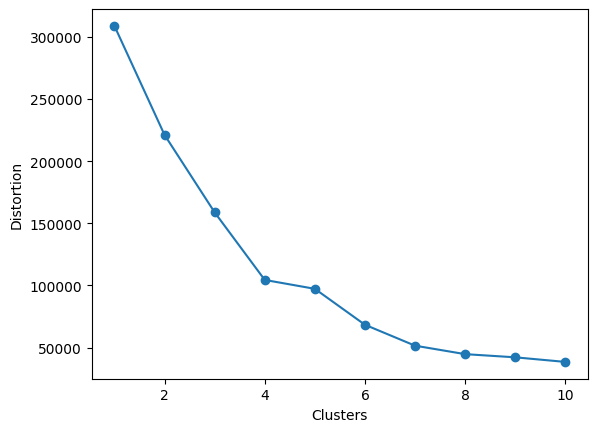

In [ ]:
warnings.filterwarnings("ignore")

distortions = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[['age', 'income', 'score','gender']])
    distortions.append(kmeans.inertia_)

plt.plot(range(1, 11), distortions, marker='o')
plt.title('')
plt.xlabel('Clusters')
plt.ylabel('Distortion')
plt.show()

In [ ]:
warnings.filterwarnings("ignore")

kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['age', 'income', 'score', 'gender']])

# Segmentasi

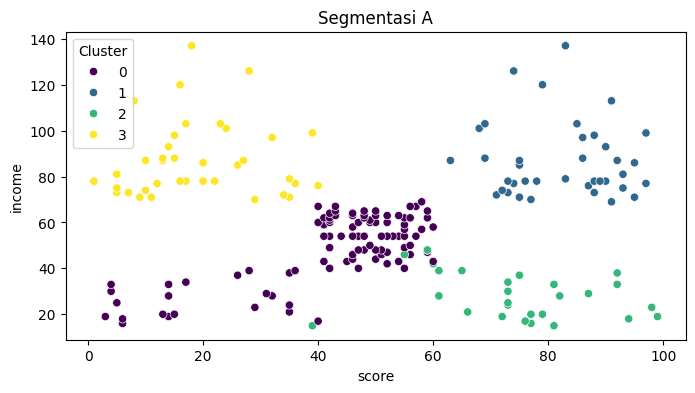

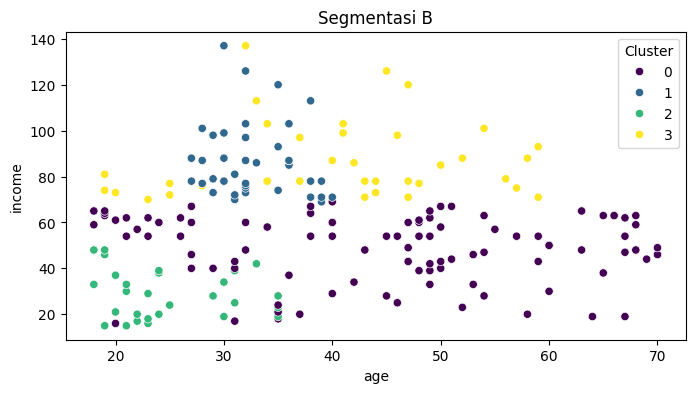

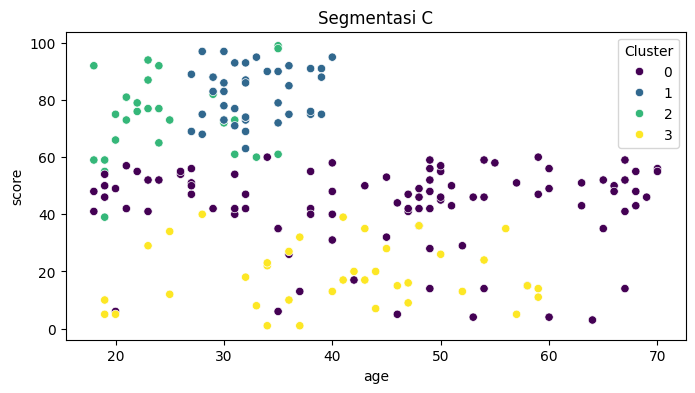

In [ ]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='score', y='income', hue='Cluster', data=df, palette='viridis')
plt.title('Segmentasi A')

plt.figure(figsize=(8,4))
sns.scatterplot(x='age', y='income', hue='Cluster', data=df, palette='viridis')
plt.title('Segmentasi B')

plt.figure(figsize=(8,4))
sns.scatterplot(x='age', y='score', hue='Cluster', data=df, palette='viridis')
plt.title('Segmentasi C')
plt.show()